Nesse estudo vou analisar ROI se apostarmos em todos os jogos do Dataset com determinados critérios. 

Vamos criar novo DataFrame com os campos Hard, Clay, Grass, Indoor, odds1, odds2, J1_W, pl1 e pl2 e uma função para criar os gráficos de barra.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


#Função para criar os gráficos de barras
def graficoDeBarras(valores,titulo):
    labels = [e for e in valores]
    rois = [valores[e]*100 for e in valores]

    index = np.arange(len(labels))

    plt.figure(figsize=(12,6))
    plt.bar(index, rois)
    plt.ylabel('ROI')
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.xticks(index, labels, fontsize=10, rotation=0)
    plt.title(titulo)
    
    ajuste_labels=0.0248*min(rois) - 0.0272
    for i in range(len(rois)): plt.text(i-0.1, rois[i]+ajuste_labels, "{0:.2%}".format(rois[i]/100) ) 
    plt.show()



#Lê o arquivo CSV 
df=pd.read_csv('../input/ATP_matches_tennis-data.co.uk.csv',low_memory=False)


#Remove as linhas que não possuam preenchidos os campos B365W, PSW e que o Piso é Carpete
df= df[df.B365W.notnull() &  df.PSW.notnull() & (df.Surface!='Carpet') ]   

df2=pd.DataFrame(columns=['Hard','Clay','Grass','Indoor','odds1','odds2','J1_W', 'pl1', 'pl2'])


df2.Hard  = np.where(df.Surface=='Hard', 1, 0)
df2.Clay  = np.where(df.Surface=='Clay', 1, 0)
df2.Grass  = np.where(df.Surface=='Grass', 1, 0)
df2.Indoor = np.where(df.Court=='Indoor', 1, 0) 

#Odds Pinnacle para J1 e J2
df2.odds1 = np.where(df.PSW<df.PSL, df.PSW, df.PSL)
df2.odds2 = np.where(df.PSW>df.PSL, df.PSW, df.PSL) 


# 1 se J1 venceu, 0 se J2 venceu
df2.J1_W = np.where(df.PSW<df.PSL, 1, 0) 

#Lucro se tivessem apostado no J1 e no J2
df2.pl1=np.where(df2.J1_W==1, df2.odds1, 0)-1
df2.pl2=np.where(df2.J1_W==0, df2.odds2, 0)-1

df=df2

df


,Hard,Clay,Grass,Indoor,odds1,odds2,J1_W,pl1,pl2
0,1,0,0,0,1.305,3.780,1,0.305,-1.000
1,1,0,0,0,1.840,1.990,0,-1.000,0.990
2,1,0,0,0,1.901,1.917,1,0.901,-1.000
3,1,0,0,0,1.621,2.410,1,0.621,-1.000
4,1,0,0,0,1.787,2.070,1,0.787,-1.000
5,1,0,0,0,1.408,3.100,1,0.408,-1.000
6,1,0,0,0,1.575,2.540,1,0.575,-1.000
7,1,0,0,0,1.549,2.620,1,0.549,-1.000
8,1,0,0,0,1.435,3.000,1,0.435,-1.000
9,1,0,0,0,1.719,2.190,1,0.719,-1.000


Segue uma simulação do ROI médio se tivessemos apostados em todos os Favoritos e em todos Underdogs. De longe, a nossa desvantagem é menor se nos concentrarmos em realizar nos favoritos na Pinnacle.

Vou criar uma série de gráficos de Barras. Então para facilitar vou criar uma função para criar os gráficos

{'Favorito': -0.020981952826613387, 'Underdog': -0.04891142598909653}


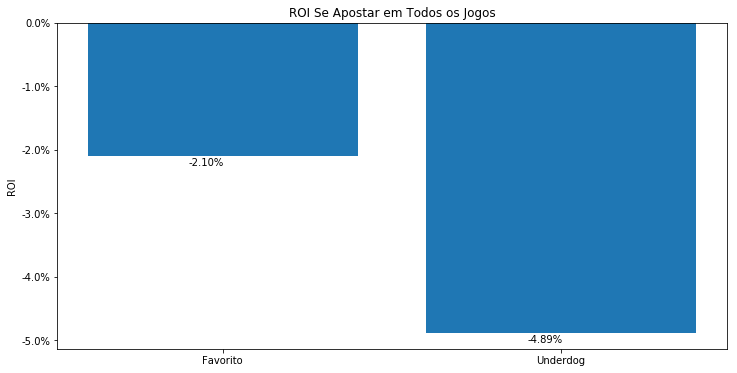

In [2]:
medias={
    'Favorito': df.pl1.mean(),
    'Underdog': df.pl2.mean()
}

print(medias)
graficoDeBarras(medias,'ROI Se Apostar em Todos os Jogos')

Vamos nos concentrar nos Favoritos e vamos ver o ROI por Piso

{'Hard': -0.02450371100846023, 'Clay': -0.01979418667629521, 'Grass': -0.007148963075366733}


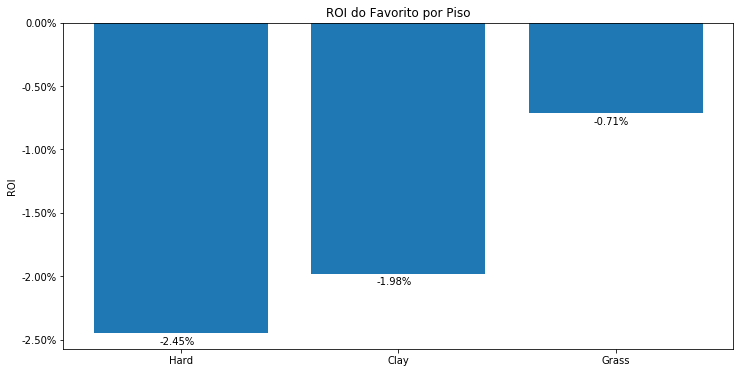

In [3]:
medias={
    'Hard': df[df.Hard==1].pl1.mean(),
    'Clay': df[df.Clay==1].pl1.mean(),
    'Grass':df[df.Grass==1].pl1.mean()
}

print(medias)
graficoDeBarras(medias,'ROI do Favorito por Piso')

Se será que há diferença em jogs Indoor e Outdoor ?

{'Indoor': -0.03465093998553871, 'Outdoor': -0.018353356276288885}


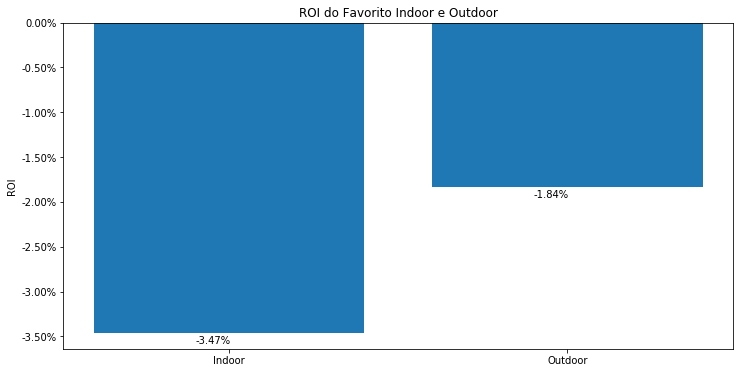

In [4]:
medias={
    'Indoor': df[df.Indoor==1].pl1.mean(),
    'Outdoor':df[df.Indoor==0].pl1.mean()
}

print(medias)
graficoDeBarras(medias,'ROI do Favorito Indoor e Outdoor')

Opa! Parece que os jogos Indoor são bem menos vantajosos que os poucos menos vantajosos que os Outdoor. Mas pode se que amostra se muito pequena e tenha pouca relavância. Vou comprar a percentual de jogos Indoor e Outdout.

In [5]:
print('Indoor: ',"{0:.1%}".format(len(df[df.Indoor==1])/len(df)) )
print('Outdoor:',"{0:.1%}".format(len(df[df.Indoor==0])/len(df)) )

Indoor:  16.1%
Outdoor: 83.9%


É um percentual pequeno de jogos Indoor, mas não é irrelante. Vou procurar evitar os jogos então.

Esse se for um partida Outdoor em Piso que não seja Hard

{'Geral': -0.020981952826613387, 'Outdoor e Não Hard': -0.015686508739960775}


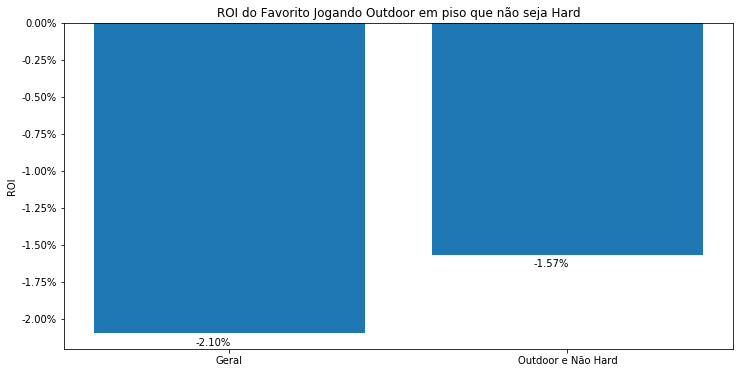

In [6]:
medias={
    'Geral': df.pl1.mean(),
    'Outdoor e Não Hard':df[(df.Indoor==0) &  (df.Hard==0)].pl1.mean()
}

print(medias)
graficoDeBarras(medias,'ROI do Favorito Jogando Outdoor em piso que não seja Hard')

Agora vamos analisar a lucratividade por faixa de odds. Será exibido o ROI do Favorito por quartil da odds.

{'1.0 <--> 1.24': -0.01281979546256023, '1.24 <--> 1.426': -0.007892985925322825, '1.426 <--> 1.64': -0.022401206101454293, '1.64 <--> 1.962': -0.039993015800320594}


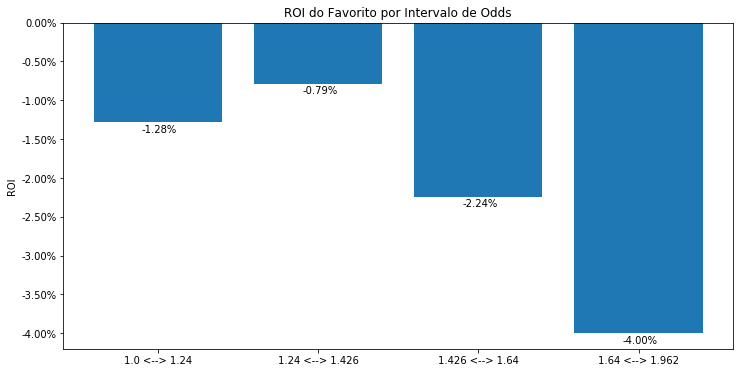

In [7]:
medias={}
for percent in [0,25,50,75]:
    odds_percent_i, odds_percent_f = np.percentile(df.odds1,percent), np.percentile(df.odds1,percent+25)
    medias[str( odds_percent_i)+' <--> '+ str( odds_percent_f)]=df[(df.odds1>=odds_percent_i) & (df.odds1<odds_percent_f)].pl1.mean()

print(medias)
graficoDeBarras(medias,'ROI do Favorito por Intervalo de Odds')